# Monthly Corn Price Forecasting using Linear Regression

In [1]:
# Project 3      
#importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns 
import datetime 
import os
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline
from sklearn.linear_model import LinearRegression

## 1. Data Imports, Merges and Cleanup

In [2]:
# Read in corn actual price and sort by date
corn_act_prices = pd.read_csv(Path("../Resources/combined_portfolios_df.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True).sort_index()
# Dropping Natural Gas and Corn Future
corn_act_prices = corn_act_prices.drop(columns=["Natural_Gas_future", "Corn_future"])
corn_act_prices.head(2), corn_act_prices.tail(2)

(            Corn_Price  USD_Index  Ethanol_future  avg_prcp    avg_max  \
 Date                                                                     
 2005-03-28      2.1275  84.620003           1.230  4.336889  13.597000   
 2005-03-29      2.1300  84.320000           1.225  2.400000  17.326667   
 
              avg_min  
 Date                  
 2005-03-28  0.724167  
 2005-03-29  2.610167  ,
             Corn_Price  USD_Index  Ethanol_future  avg_prcp   avg_max  \
 Date                                                                    
 2020-11-25      4.2300  91.989998            1.37  9.818667  8.318667   
 2020-11-30      4.2475  91.870003            1.40  1.456000  8.385714   
 
              avg_min  
 Date                  
 2020-11-25 -0.938833  
 2020-11-30 -4.750714  )

In [3]:
# Drop nulls from Corn DataFrame
corn_act_prices.dropna(inplace=True)

In [4]:
# Creating monthly resampling 
monthly_corn_data = corn_act_prices["Corn_Price"].resample('M').mean().to_frame()
monthly_usd_data = corn_act_prices["USD_Index"].resample('M').mean().to_frame()
monthly_eth_data = corn_act_prices["Ethanol_future"].resample('M').mean().to_frame()
monthly_prcp_data = corn_act_prices["avg_prcp"].resample('M').mean().to_frame()
monthly_max_data = corn_act_prices["avg_max"].resample('M').mean().to_frame()
monthly_min_data = corn_act_prices["avg_min"].resample('M').mean().to_frame()
#print sample
monthly_corn_data.shape

(189, 1)

In [5]:
# Merge corn price, usd index, ethanonal data and weather data
monthly_df = pd.concat(
    [monthly_corn_data, monthly_usd_data, monthly_eth_data,monthly_prcp_data,monthly_max_data, monthly_min_data], axis="columns", join="inner"
)
monthly_df
monthly_df.head()

,Corn_Price,USD_Index,Ethanol_future,avg_prcp,avg_max,avg_min
Date,,,,,,
2005-03-31,2.128125,84.322500,1.225000,3.138325,17.368113,3.035304
2005-04-30,2.087071,84.267143,1.178571,3.066759,18.284393,5.213347
2005-05-31,2.119643,85.628095,1.178095,2.494379,20.870985,7.457189
2005-06-30,2.227205,88.442273,1.308864,2.063175,28.682596,16.271220
2005-07-31,2.400875,89.659999,1.660500,3.485673,30.142435,17.787617


In [6]:
monthly_df.tail()

,Corn_Price,USD_Index,Ethanol_future,avg_prcp,avg_max,avg_min
Date,,,,,,
2020-07-31,3.311591,95.515000,1.226182,3.858295,29.996230,18.346949
2020-08-31,3.262881,93.040476,1.246381,1.319558,28.961796,15.871754
2020-09-30,3.662738,93.440952,1.328524,2.618602,23.819529,10.670561
2020-10-31,3.988977,93.408181,1.453273,2.656355,16.065539,3.668012
2020-11-30,4.155579,92.663685,1.428789,1.697486,13.961918,0.140853


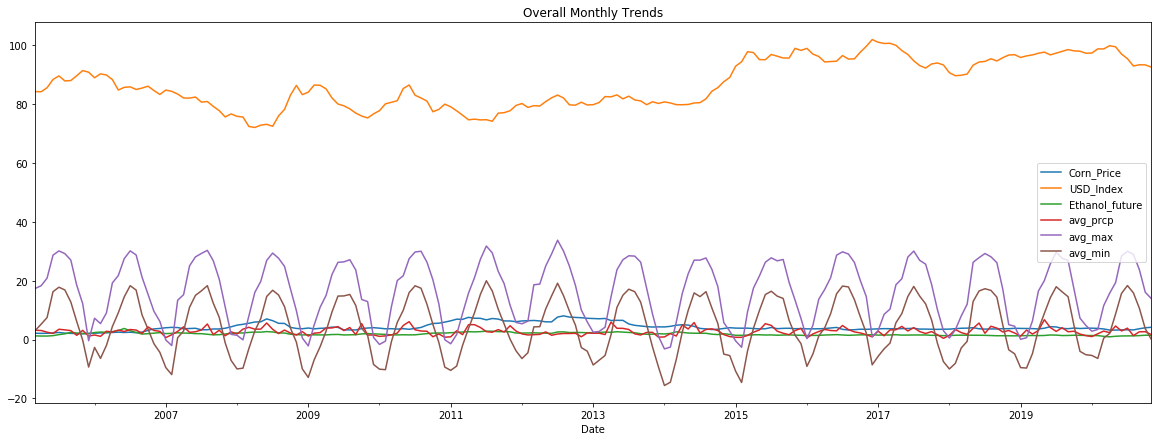

In [7]:
# Plotting and saving the Corn price trends.
monthly_df.dropna().plot(title='Overall Monthly Trends', figsize=(20,7))
plt.savefig("../Images/Overall_Monthly_Trends.png")

In [8]:
# Read in Import and inflation data
monthly_import_inf_df = pd.read_csv(Path("../Resources/monthly_import_inf_df.csv"))
# delete data before March 2005
monthly_import_inf_df = monthly_import_inf_df[62::]
monthly_import_inf_df.head(2) 

,index,China Import,China Inflation Rate,USA Inflation Rate
62,2005-MAR,5166.67,2.60,3.1
63,2005-APR,5166.67,1.78,3.5


In [9]:
monthly_import_inf_df.tail()

,index,China Import,China Inflation Rate,USA Inflation Rate
245,2020-JUN,583333.33,2.51,0.6
246,2020-JUL,583333.33,1.76,1.0
247,2020-AUG,583333.33,2.39,1.3
248,2020-SEP,583333.33,1.73,1.4
249,2020-OCT,583333.33,0.54,1.2


In [10]:
# Data Check
monthly_import_inf_df.shape

(188, 4)

In [11]:
# Resetting index 
monthly_df=monthly_df.reset_index()
monthly_df.head(2)

,Date,Corn_Price,USD_Index,Ethanol_future,avg_prcp,avg_max,avg_min
0,2005-03-31,2.128125,84.322500,1.225000,3.138325,17.368113,3.035304
1,2005-04-30,2.087071,84.267143,1.178571,3.066759,18.284393,5.213347


In [12]:
monthly_df.tail(2)

,Date,Corn_Price,USD_Index,Ethanol_future,avg_prcp,avg_max,avg_min
187,2020-10-31,3.988977,93.408181,1.453273,2.656355,16.065539,3.668012
188,2020-11-30,4.155579,92.663685,1.428789,1.697486,13.961918,0.140853


In [13]:
# Resetting index 
monthly_import_inf_df=monthly_import_inf_df.reset_index()
monthly_import_inf_df.head()

,level_0,index,China Import,China Inflation Rate,USA Inflation Rate
0,62,2005-MAR,5166.67,2.60,3.1
1,63,2005-APR,5166.67,1.78,3.5
2,64,2005-MAY,5166.67,1.68,2.8
3,65,2005-JUN,5166.67,1.58,2.5
4,66,2005-JUL,5166.67,1.78,3.2


In [14]:
# Combining all the monthly data
combined_monthly_df = pd.merge(monthly_df, monthly_import_inf_df, left_index=True, right_index=True)
# Dropping unnecessary columns
combined_monthly_df = combined_monthly_df.drop(columns = ["level_0", "index"])
# Resettng index as "Date"
combined_monthly_df = combined_monthly_df.set_index("Date")
combined_monthly_df.head()

,Corn_Price,USD_Index,Ethanol_future,avg_prcp,avg_max,avg_min,China Import,China Inflation Rate,USA Inflation Rate
Date,,,,,,,,,
2005-03-31,2.128125,84.322500,1.225000,3.138325,17.368113,3.035304,5166.67,2.60,3.1
2005-04-30,2.087071,84.267143,1.178571,3.066759,18.284393,5.213347,5166.67,1.78,3.5
2005-05-31,2.119643,85.628095,1.178095,2.494379,20.870985,7.457189,5166.67,1.68,2.8
2005-06-30,2.227205,88.442273,1.308864,2.063175,28.682596,16.271220,5166.67,1.58,2.5
2005-07-31,2.400875,89.659999,1.660500,3.485673,30.142435,17.787617,5166.67,1.78,3.2


In [15]:
combined_monthly_df.tail()

,Corn_Price,USD_Index,Ethanol_future,avg_prcp,avg_max,avg_min,China Import,China Inflation Rate,USA Inflation Rate
Date,,,,,,,,,
2020-06-30,3.278614,97.087273,1.207364,2.911674,28.406003,15.683576,583333.33,2.51,0.6
2020-07-31,3.311591,95.515000,1.226182,3.858295,29.996230,18.346949,583333.33,1.76,1.0
2020-08-31,3.262881,93.040476,1.246381,1.319558,28.961796,15.871754,583333.33,2.39,1.3
2020-09-30,3.662738,93.440952,1.328524,2.618602,23.819529,10.670561,583333.33,1.73,1.4
2020-10-31,3.988977,93.408181,1.453273,2.656355,16.065539,3.668012,583333.33,0.54,1.2


## 2. Understanding the Dataset

In [16]:
combined_monthly_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 188 entries, 2005-03-31 to 2020-10-31
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Corn_Price            188 non-null    float64
 1   USD_Index             188 non-null    float64
 2   Ethanol_future        188 non-null    float64
 3   avg_prcp              188 non-null    float64
 4   avg_max               188 non-null    float64
 5   avg_min               188 non-null    float64
 6   China Import          188 non-null    float64
 7   China Inflation Rate  188 non-null    float64
 8   USA Inflation Rate    188 non-null    float64
dtypes: float64(9)
memory usage: 14.7 KB


In [17]:
#Construct a correlation table
correlation_table = combined_monthly_df.corr()
correlation_table

,Corn_Price,USD_Index,Ethanol_future,avg_prcp,avg_max,avg_min,China Import,China Inflation Rate,USA Inflation Rate
Corn_Price,1.000000,-0.539176,0.537619,0.015549,-0.026757,-0.044508,0.184035,0.452118,0.113305
USD_Index,-0.539176,1.000000,-0.694931,-0.024446,-0.017295,0.005028,0.405248,-0.411922,-0.304306
Ethanol_future,0.537619,-0.694931,1.000000,0.039750,0.066705,0.047025,-0.308629,0.345702,0.483133
avg_prcp,0.015549,-0.024446,0.039750,1.000000,0.487959,0.515549,0.046036,0.052426,0.006140
avg_max,-0.026757,-0.017295,0.066705,0.487959,1.000000,0.992640,-0.033778,-0.017889,0.025154
avg_min,-0.044508,0.005028,0.047025,0.515549,0.992640,1.000000,-0.015699,-0.020381,0.018693
China Import,0.184035,0.405248,-0.308629,0.046036,-0.033778,-0.015699,1.000000,-0.006541,-0.238834
China Inflation Rate,0.452118,-0.411922,0.345702,0.052426,-0.017889,-0.020381,-0.006541,1.000000,0.600791
USA Inflation Rate,0.113305,-0.304306,0.483133,0.006140,0.025154,0.018693,-0.238834,0.600791,1.000000


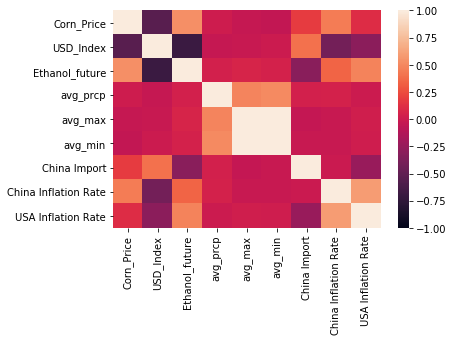

In [18]:
#correlation matrix using a heatmap
sns.heatmap(correlation_table, vmin=-1, vmax=1)

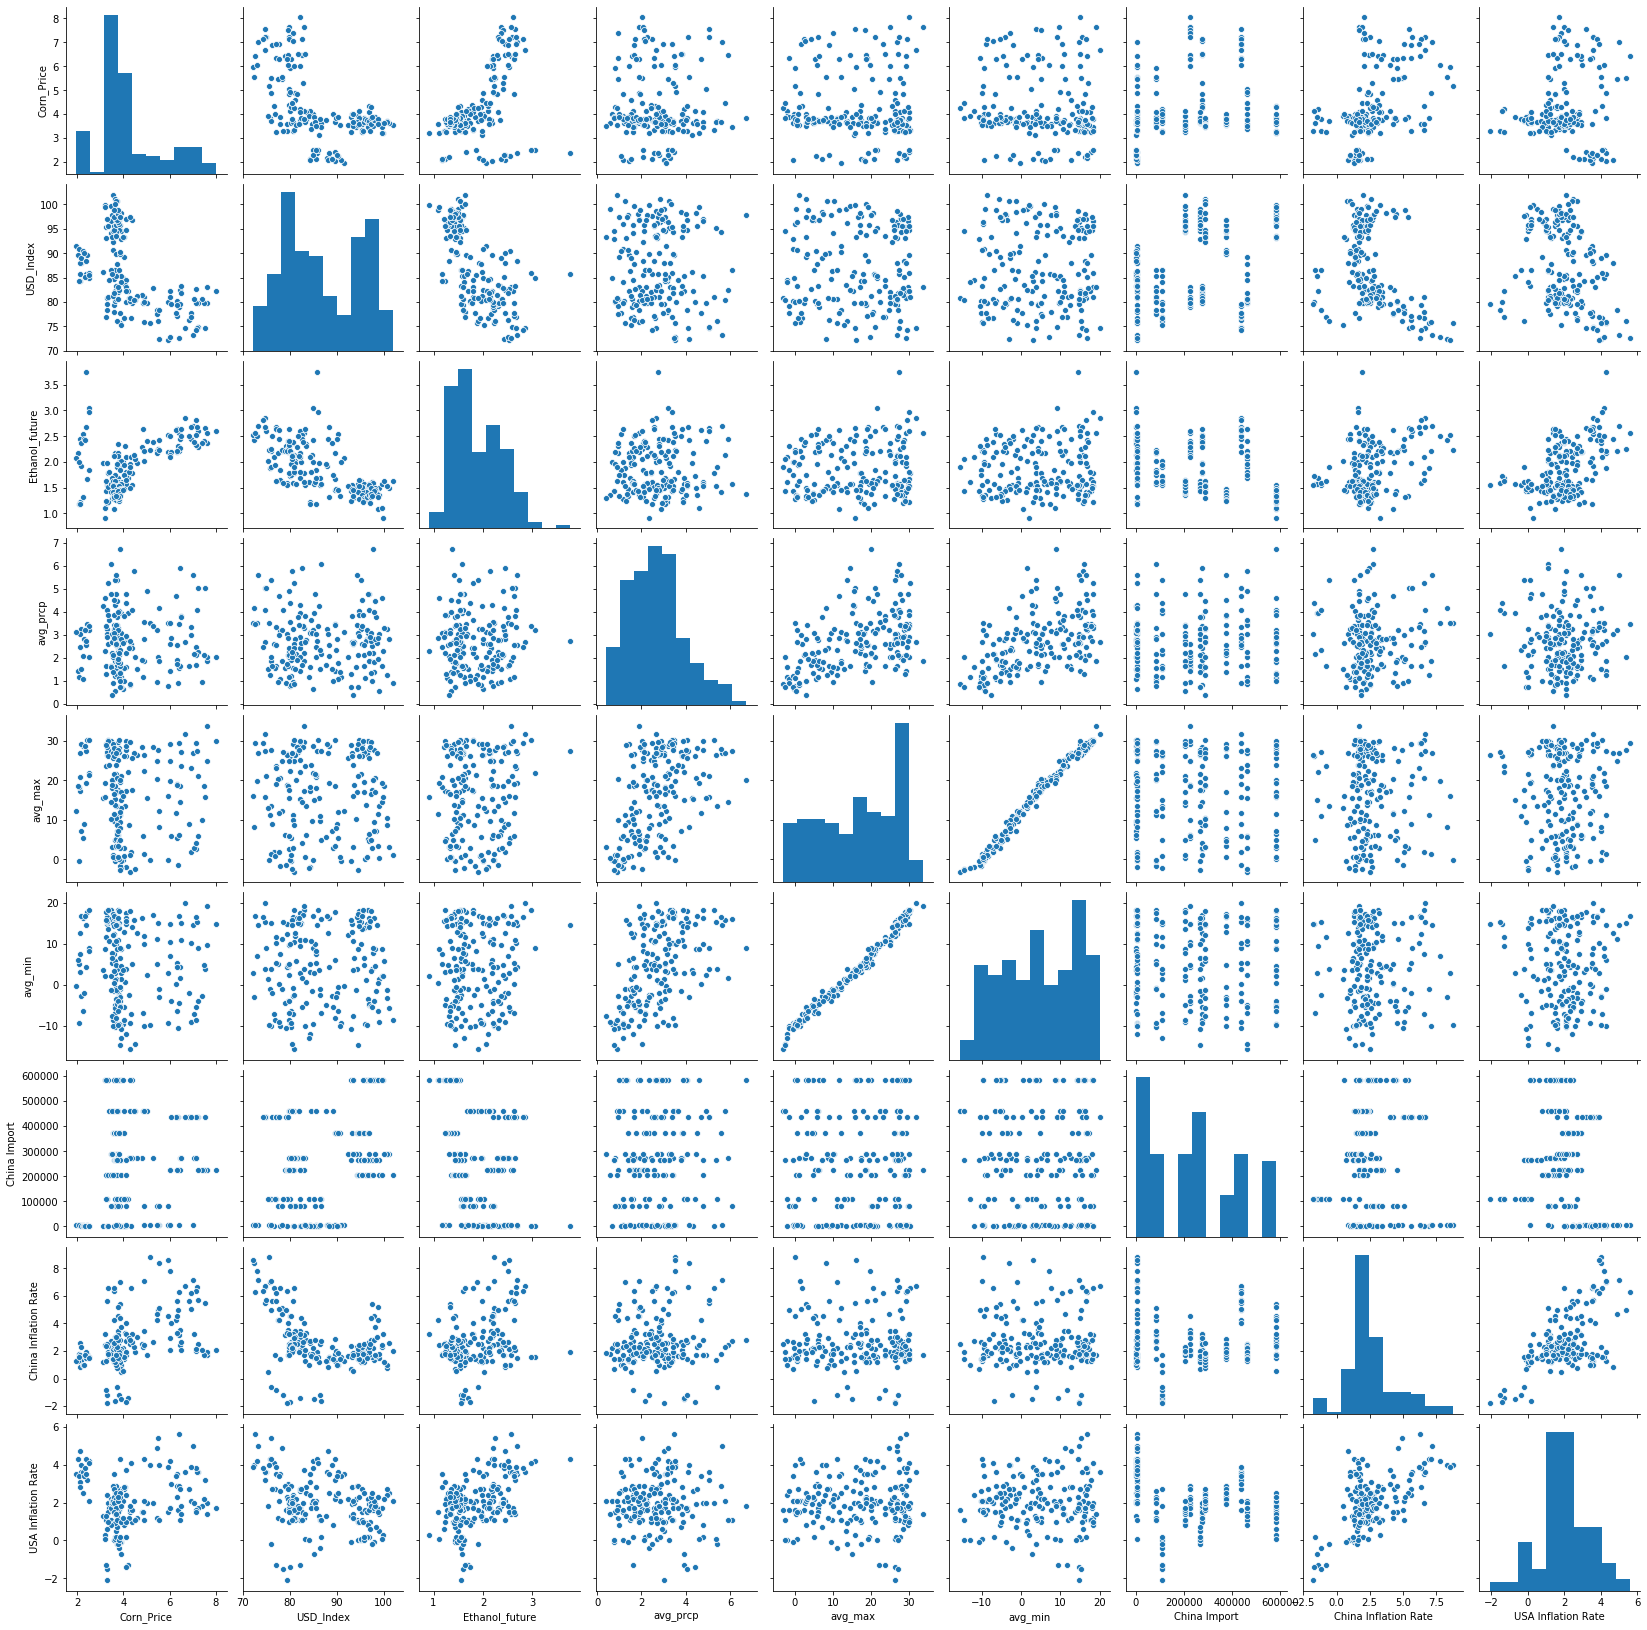

In [18]:
# Looking at the datasets with respect to each variable in pairs
sns.pairplot(combined_monthly_df)

In [19]:
# Checking datasets size
combined_monthly_df.shape

(188, 9)

In [20]:
# Display some sample
combined_monthly_df.head()

,Corn_Price,USD_Index,Ethanol_future,avg_prcp,avg_max,avg_min,China Import,China Inflation Rate,USA Inflation Rate
Date,,,,,,,,,
2005-03-31,2.128125,84.322500,1.225000,3.138325,17.368113,3.035304,5166.67,2.60,3.1
2005-04-30,2.087071,84.267143,1.178571,3.066759,18.284393,5.213347,5166.67,1.78,3.5
2005-05-31,2.119643,85.628095,1.178095,2.494379,20.870985,7.457189,5166.67,1.68,2.8
2005-06-30,2.227205,88.442273,1.308864,2.063175,28.682596,16.271220,5166.67,1.58,2.5
2005-07-31,2.400875,89.659999,1.660500,3.485673,30.142435,17.787617,5166.67,1.78,3.2


## 3. Preparing Data for future forecasting

In [22]:
# Creating a lag of 6 months to predict for future six months
combined_monthly_df['Corn_Price_6Mo_Forward']=combined_monthly_df['Corn_Price'].shift(-6)
combined_monthly_df.head(10)

,Corn_Price,USD_Index,Ethanol_future,avg_prcp,avg_max,avg_min,China Import,China Inflation Rate,USA Inflation Rate,Corn_Price_6Mo_Forward
Date,,,,,,,,,,
2005-03-31,2.128125,84.322500,1.225000,3.138325,17.368113,3.035304,5166.67,2.60,3.1,2.098810
2005-04-30,2.087071,84.267143,1.178571,3.066759,18.284393,5.213347,5166.67,1.78,3.5,2.020595
2005-05-31,2.119643,85.628095,1.178095,2.494379,20.870985,7.457189,5166.67,1.68,2.8,1.944275
2005-06-30,2.227205,88.442273,1.308864,2.063175,28.682596,16.271220,5166.67,1.58,2.5,2.082976
2005-07-31,2.400875,89.659999,1.660500,3.485673,30.142435,17.787617,5166.67,1.78,3.2,2.133875
2005-08-31,2.164543,87.940870,1.927130,3.274888,29.200012,16.847420,5166.67,1.28,3.6,2.241211
2005-09-30,2.098810,88.080000,2.446429,3.020359,27.022305,12.756800,5166.67,0.87,4.7,2.278804
2005-10-31,2.020595,89.721904,2.182000,1.425138,18.427812,6.085981,5166.67,1.28,4.3,2.379974
2005-11-30,1.944275,91.464501,2.070500,3.105731,12.204639,-0.225664,5166.67,1.28,3.5,2.499545


In [23]:
combined_monthly_df.tail(10)

,Corn_Price,USD_Index,Ethanol_future,avg_prcp,avg_max,avg_min,China Import,China Inflation Rate,USA Inflation Rate,Corn_Price_6Mo_Forward
Date,,,,,,,,,,
2020-01-31,3.857381,97.437619,1.336571,0.998179,2.818254,-5.417352,583333.33,5.42,2.5,3.311591
2020-02-29,3.777579,98.843159,1.326053,1.931942,3.422693,-6.440044,583333.33,5.18,2.3,3.262881
2020-03-31,3.588636,98.830455,1.082636,2.872590,11.529634,0.470230,583333.33,4.27,1.5,3.662738
2020-04-30,3.217643,99.920000,0.918524,2.319463,15.740839,2.065521,583333.33,3.25,0.3,3.988977
2020-05-31,3.194125,99.558000,1.102750,4.592448,19.352983,8.676656,583333.33,2.41,0.1,NaN
2020-06-30,3.278614,97.087273,1.207364,2.911674,28.406003,15.683576,583333.33,2.51,0.6,NaN
2020-07-31,3.311591,95.515000,1.226182,3.858295,29.996230,18.346949,583333.33,1.76,1.0,NaN
2020-08-31,3.262881,93.040476,1.246381,1.319558,28.961796,15.871754,583333.33,2.39,1.3,NaN
2020-09-30,3.662738,93.440952,1.328524,2.618602,23.819529,10.670561,583333.33,1.73,1.4,NaN


In [24]:
#Preparing the data for future forecast of 90 days
forecast_6 = combined_monthly_df[-6:]
forecast_6.head(3)

,Corn_Price,USD_Index,Ethanol_future,avg_prcp,avg_max,avg_min,China Import,China Inflation Rate,USA Inflation Rate,Corn_Price_6Mo_Forward
Date,,,,,,,,,,
2020-05-31,3.194125,99.558000,1.102750,4.592448,19.352983,8.676656,583333.33,2.41,0.1,NaN
2020-06-30,3.278614,97.087273,1.207364,2.911674,28.406003,15.683576,583333.33,2.51,0.6,NaN
2020-07-31,3.311591,95.515000,1.226182,3.858295,29.996230,18.346949,583333.33,1.76,1.0,NaN


In [25]:
# Drop nulls from Corn DataFrame
combined_monthly_df.dropna(inplace=True)
combined_monthly_df.head()

,Corn_Price,USD_Index,Ethanol_future,avg_prcp,avg_max,avg_min,China Import,China Inflation Rate,USA Inflation Rate,Corn_Price_6Mo_Forward
Date,,,,,,,,,,
2005-03-31,2.128125,84.322500,1.225000,3.138325,17.368113,3.035304,5166.67,2.60,3.1,2.098810
2005-04-30,2.087071,84.267143,1.178571,3.066759,18.284393,5.213347,5166.67,1.78,3.5,2.020595
2005-05-31,2.119643,85.628095,1.178095,2.494379,20.870985,7.457189,5166.67,1.68,2.8,1.944275
2005-06-30,2.227205,88.442273,1.308864,2.063175,28.682596,16.271220,5166.67,1.58,2.5,2.082976
2005-07-31,2.400875,89.659999,1.660500,3.485673,30.142435,17.787617,5166.67,1.78,3.2,2.133875


In [26]:
#Display sample
combined_monthly_df.tail()

,Corn_Price,USD_Index,Ethanol_future,avg_prcp,avg_max,avg_min,China Import,China Inflation Rate,USA Inflation Rate,Corn_Price_6Mo_Forward
Date,,,,,,,,,,
2019-12-31,3.830250,97.365000,1.385350,1.323800,4.776800,-5.182336,583333.33,4.41,2.3,3.278614
2020-01-31,3.857381,97.437619,1.336571,0.998179,2.818254,-5.417352,583333.33,5.42,2.5,3.311591
2020-02-29,3.777579,98.843159,1.326053,1.931942,3.422693,-6.440044,583333.33,5.18,2.3,3.262881
2020-03-31,3.588636,98.830455,1.082636,2.872590,11.529634,0.470230,583333.33,4.27,1.5,3.662738
2020-04-30,3.217643,99.920000,0.918524,2.319463,15.740839,2.065521,583333.33,3.25,0.3,3.988977


In [27]:
# Data checks
combined_monthly_df.shape

(182, 10)

## 4. Training and Validation Datasplit

In [28]:
# Train Test Split of 80% 20%
train = combined_monthly_df.loc['2005-03-28':'2016-09-30']
test = combined_monthly_df.loc['2016-10-31':]
train.shape, train.tail(2), test.shape, test.head(2)

((139, 10),
             Corn_Price  USD_Index  Ethanol_future  avg_prcp    avg_max  \
 Date                                                                     
 2016-08-31    3.240696  95.380000        1.430130  3.377286  29.069341   
 2016-09-30    3.337500  95.465238        1.508857  2.587360  26.225508   
 
               avg_min  China Import  China Inflation Rate  USA Inflation Rate  \
 Date                                                                            
 2016-08-31  17.878201     205333.33                  1.29                 1.1   
 2016-09-30  13.569021     205333.33                  1.89                 1.5   
 
             Corn_Price_6Mo_Forward  
 Date                                
 2016-08-31                3.699737  
 2016-09-30                3.656848  ,
 (43, 10),
             Corn_Price  USD_Index  Ethanol_future  avg_prcp    avg_max  \
 Date                                                                     
 2016-10-31     3.49800  97.738999        

## 5. Prepare the Features (X) and the Target (y)

In [29]:
# Create dataframes for X_train and X_test and series for y_train and y_test
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
X_train = train.drop(columns=["Corn_Price_6Mo_Forward"])
X_test = test.drop(columns=["Corn_Price_6Mo_Forward"])
y_train = train["Corn_Price_6Mo_Forward"]
y_test = test["Corn_Price_6Mo_Forward"]

In [30]:
# Dispaly some sample
X_train.head(3)

,Corn_Price,USD_Index,Ethanol_future,avg_prcp,avg_max,avg_min,China Import,China Inflation Rate,USA Inflation Rate
Date,,,,,,,,,
2005-03-31,2.128125,84.322500,1.225000,3.138325,17.368113,3.035304,5166.67,2.60,3.1
2005-04-30,2.087071,84.267143,1.178571,3.066759,18.284393,5.213347,5166.67,1.78,3.5
2005-05-31,2.119643,85.628095,1.178095,2.494379,20.870985,7.457189,5166.67,1.68,2.8


In [31]:
# Dispaly some sample
y_train[:3], y_test[:3]

(Date
 2005-03-31    2.098810
 2005-04-30    2.020595
 2005-05-31    1.944275
 Name: Corn_Price_6Mo_Forward, dtype: float64,
 Date
 2016-10-31    3.638342
 2016-11-30    3.705455
 2016-12-31    3.731818
 Name: Corn_Price_6Mo_Forward, dtype: float64)

In [32]:
# Dispaly some sample
X_test.head(3)

,Corn_Price,USD_Index,Ethanol_future,avg_prcp,avg_max,avg_min,China Import,China Inflation Rate,USA Inflation Rate
Date,,,,,,,,,
2016-10-31,3.498000,97.738999,1.586150,2.235304,20.064414,7.706339,205333.33,2.20,1.6
2016-11-30,3.463350,99.705500,1.574450,1.664132,14.608031,2.214650,205333.33,2.30,1.7
2016-12-31,3.535952,102.013333,1.626667,0.912851,0.941135,-8.615651,205333.33,1.99,2.1


In [33]:
# Data Checks
y_train.dtype, y_test.dtype

(dtype('float64'), dtype('float64'))

## 6. Linear Regression Model Development

In [34]:
#Fit a SKLearn linear regression using  just the training set (X_train, Y_train):
model = LinearRegression()
model.fit(X_train, y_train)
print(model.coef_)
print(model.intercept_)

[ 4.80198571e-01 -2.83792938e-02  1.99266504e-01 -2.27161589e-01
  5.06464480e-02 -3.37440462e-02 -4.98316454e-07  2.88584547e-01
 -3.49873771e-01]
4.275378234087627


## 7. Future Forecast

In [35]:
#Looking at the model parameters in dataframe
pd.DataFrame(model.coef_, X_train.columns, columns = ['Coeff'])

,Coeff
Corn_Price,4.801986e-01
USD_Index,-2.837929e-02
Ethanol_future,1.992665e-01
avg_prcp,-2.271616e-01
avg_max,5.064645e-02
avg_min,-3.374405e-02
China Import,-4.983165e-07
China Inflation Rate,2.885845e-01
USA Inflation Rate,-3.498738e-01


In [36]:
# Next 6 Months prediction
forecast_6 = forecast_6.drop(columns=["Corn_Price_6Mo_Forward"])
predictions_6 = model.predict(forecast_6)
predictions_6

array([3.21751137, 3.8068364 , 3.29028424, 4.02582659, 3.61736602,
       3.3613795 ])

In [37]:
monthly_forecast =  pd.DataFrame(predictions_6, columns = ['Corn Price Forecast'])
monthly_forecast.to_csv("../Resources/monthly_forecast.csv")

## 8. Make predictions using the Testing Data
Note: We want to evaluate the model using data that it has never seen before, in this case: X_test.

In [38]:
# And make a prediction of "y" values for just the test dataset
predictions = model.predict(X_test)
predictions

array([3.71855565, 3.67636218, 3.27066597, 2.86745687, 2.89024338,
       2.60155056, 2.93125465, 2.97338998, 3.67111967, 3.38033746,
       3.59785436, 3.64991697, 3.38442171, 3.32853985, 3.54058503,
       3.20906766, 3.32547653, 3.38833954, 3.55834269, 3.1592997 ,
       2.52094169, 3.40580541, 2.93781189, 3.22030443, 3.35720735,
       2.87564295, 3.19471054, 3.33353682, 2.85128655, 3.34359934,
       3.27188705, 2.67561837, 3.7442427 , 4.01158557, 3.44669336,
       3.76986804, 3.87939065, 3.93823485, 3.92091062, 4.12635942,
       3.89977623, 3.74191709, 3.9107364 ])

In [39]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test.to_frame()
Results["Predicted Return"] = predictions
Results.head(3)

,Corn_Price_6Mo_Forward,Predicted Return
Date,,
2016-10-31,3.638342,3.718556
2016-11-30,3.705455,3.676362
2016-12-31,3.731818,3.270666


In [40]:
# Display top 3 rows
Results.head(3), Results.tail(3)

(            Corn_Price_6Mo_Forward  Predicted Return
 Date                                                
 2016-10-31                3.638342          3.718556
 2016-11-30                3.705455          3.676362
 2016-12-31                3.731818          3.270666,
             Corn_Price_6Mo_Forward  Predicted Return
 Date                                                
 2020-02-29                3.262881          3.899776
 2020-03-31                3.662738          3.741917
 2020-04-30                3.988977          3.910736)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000011FB8CD2A88>,
      dtype=object)

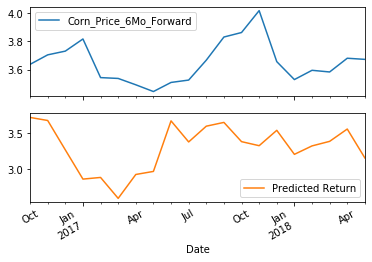

In [41]:
# Plot the first 20 predictions against the true values to see how it performed
# The trends lines should be similar
Results[:20].plot(subplots=True)

## 9. Out-of-Sample Performance

Evaluate the model using "out-of-sample" data (X_test and y_test)

In [42]:
from sklearn.metrics import mean_squared_error

# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# A "good" MSE score will be close to zero.
mse = mean_squared_error(Results["Corn_Price_6Mo_Forward"],Results["Predicted Return"])
# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
rmse = np.sqrt(mse)

# Print the MSE, RMSE and standard deviation
print(f"Mean Squared Error (MSE): {mse}")
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {rmse}")
print(f"Standard Deviation of Futures Return: {np.std(Results.Corn_Price_6Mo_Forward)}")

Mean Squared Error (MSE): 0.3566135788881258
Out-of-Sample Root Mean Squared Error (RMSE): 0.597171314522161
Standard Deviation of Futures Return: 0.2383436227954236


## 10. In-Sample Performance

Evaluate the model using in-sample data (X_train and y_train)

In [43]:
# Construct a dataframe using just the "y" training data:
in_sample_results = y_train.to_frame()

# Add a column of "in-sample" predictions to that DataFrame:  
in_sample_results["In-sample Predictions"] = model.predict(X_train)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(in_sample_results["Corn_Price_6Mo_Forward"],in_sample_results["In-sample Predictions"]
)
# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)

in_sample_rmse = np.sqrt(in_sample_mse)
# Print the mser, rmse, and standard deviation
print(f"Mean Squared Error (MSE): {mse}")
print(f"In-sample Root Mean Squared Error (RMSE): {rmse}")
print(f"Standard Deviation of Futures Return: {np.std(in_sample_results.Corn_Price_6Mo_Forward)}")

Mean Squared Error (MSE): 0.3566135788881258
In-sample Root Mean Squared Error (RMSE): 0.597171314522161
Standard Deviation of Futures Return: 1.4966651591792786
